In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df.shape

(9551, 21)

In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
# Fill missing values in 'Cuisines' with 'Unknown'
df['Cuisines'].fillna('Unknown', inplace=True)

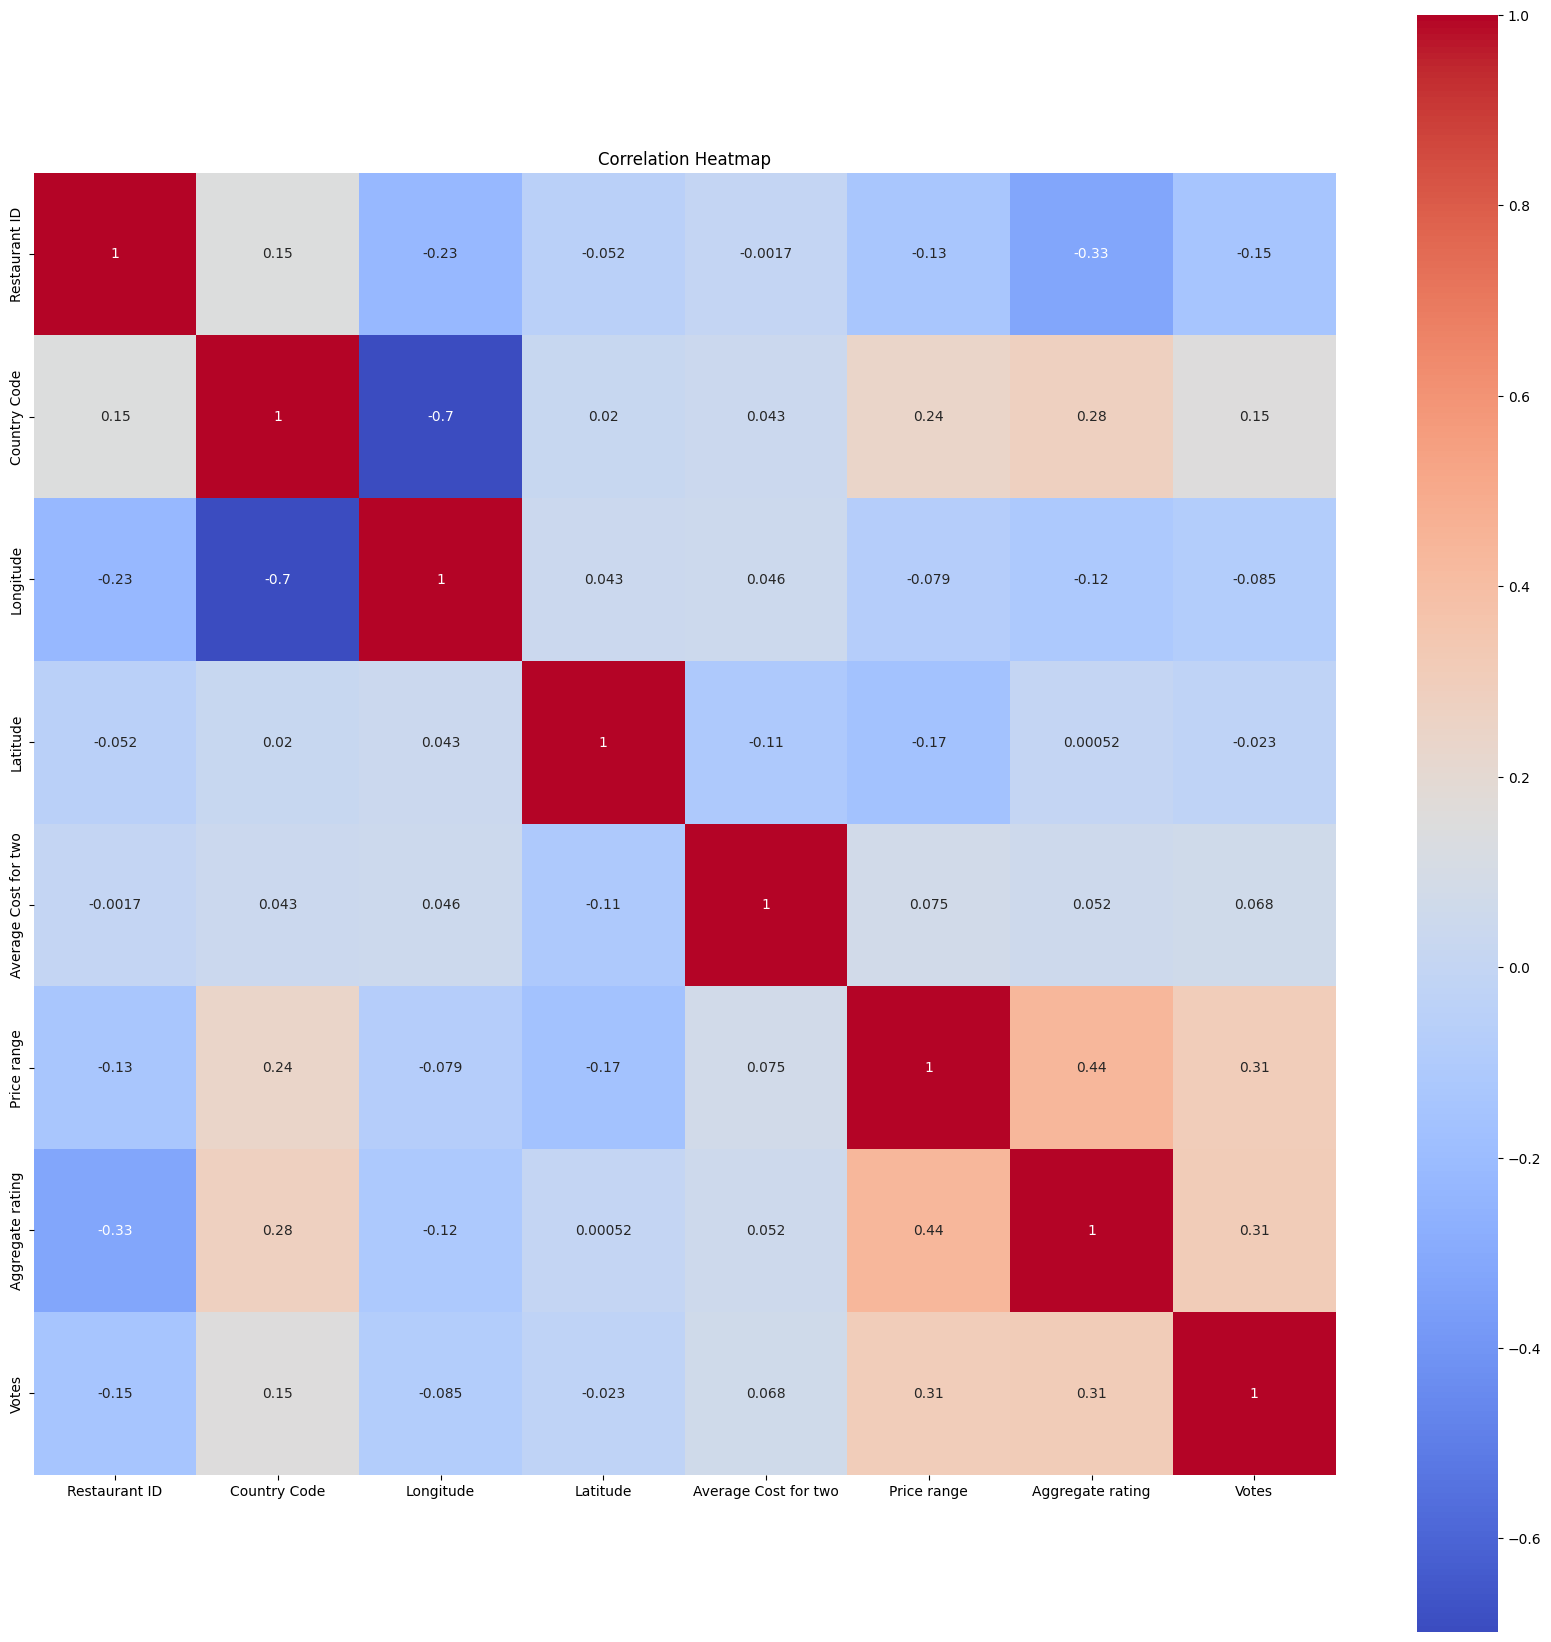

In [10]:
numeric_data = df.select_dtypes(include=[np.number])  # Keeps only numeric columns

# Compute the correlation matrix
corr = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(21, 21))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Select features and target
features = ['Country Code', 'City', 'Locality', 'Cuisines', 'Average Cost for two', 'Has Table booking', 
            'Has Online delivery', 'Price range', 'Votes']
target = 'Aggregate rating'

In [12]:
# Split the data into training and testing sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), ['Average Cost for two', 'Votes']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Country Code', 'City', 'Locality', 'Cuisines', 
                                                         'Has Table booking', 'Has Online delivery', 'Price range'])
    ])

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [15]:
# Define a function to train and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    return rmse, r2, pipeline

In [16]:
# Train and evaluate Linear Regression model
linear_regression = LinearRegression()
lr_rmse, lr_r2, lr_pipeline = train_and_evaluate_model(linear_regression, X_train, y_train, X_test, y_test)


In [17]:
# Train and evaluate Decision Tree Regressor model
decision_tree = DecisionTreeRegressor(random_state=42)
dt_rmse, dt_r2, dt_pipeline = train_and_evaluate_model(decision_tree, X_train, y_train, X_test, y_test)


In [18]:
# Results
print(f"Linear Regression RMSE: {lr_rmse}, R2: {lr_r2}")
print(f"Decision Tree RMSE: {dt_rmse}, R2: {dt_r2}")

Linear Regression RMSE: 1.0886927815623182, R2: 0.47926396421608175
Decision Tree RMSE: 0.3935109444758709, R2: 0.9319668504093748


In [19]:
# Getting feature names after one-hot encoding
feature_names = preprocessor.transformers_[1][1].get_feature_names_out(['Country Code', 'City', 'Locality', 'Cuisines', 
                                                                        'Has Table booking', 'Has Online delivery', 'Price range'])
numerical_features = ['Average Cost for two', 'Votes']
all_feature_names = np.concatenate((numerical_features, feature_names))

In [20]:
# Feature importances for Decision Tree
feature_importances = dt_pipeline.named_steps['regressor'].feature_importances_
important_features = sorted(zip(all_feature_names, feature_importances), key=lambda x: x[1], reverse=True)


In [21]:
# Display most important features
print("Most influential features (Decision Tree):")
for feature, importance in important_features[:10]:
    print(f"{feature}: {importance:.4f}")

Most influential features (Decision Tree):
Votes: 0.9453
Country Code_1: 0.0071
Average Cost for two: 0.0046
Country Code_30: 0.0014
Has Online delivery_No: 0.0011
City_New Delhi: 0.0011
Cuisines_North Indian, Mughlai, Chinese: 0.0008
City_Noida: 0.0007
Cuisines_Pizza, Fast Food: 0.0007
Has Table booking_Yes: 0.0007
